In [1]:
import numpy as np

In [2]:
def s_r(x):
    return x**4 - 2*x +1

N = 1000
a = 0.0
b = 2.0
h = (b-a)/N

kodd = 0.0
keven = 0.0

for k in range (1,N//2+1,1):
    kodd +=   (s_r(a + (2*k - 1)*h) )
for k in range (1,N//2,1):
    keven +=  (s_r(a + 2*k*h) )

I = (h/3) * ( s_r(a) + s_r(b) + 4*kodd + 2*keven)
   
print(I)

4.400000000004267


In [3]:
#would have in numerator: -b^2 + b^2 - 4ac / 2a, leaves 2c / b-+sqrt
import math

def quad(a,b,c):
    R = ((b**2 - 4*a*c))**0.5
    
    return (math.trunc((-b + R)*1000)/1000) / (2*a), (math.trunc((-b - R)*1000)/1000) / (2*a)

def quad_alt(a,b,c):
    R = ((b**2 - 4*a*c)**(0.5))
    return (2*c) / (round((-b - R)*100)/100), (2*c) / (((-b + R)*1000)/1000)

#seems to always fail with the second output here, so lets keep second from quad and first from quad_alt

def quad_final(a,b,c):
    R = ((b**2 - 4*a*c))**0.5
    
    return (2*c) / (round((-b - R)*100)/100), (round((-b - R)*100)/100) / (2*a)

#print(quad(.001,1000,.001))
#print (quad_alt(0.001,1000,0.001))

print (quad_final(0.001,1000,0.001))

(-1e-06, -1000000.0)


(5.0, 500.0)

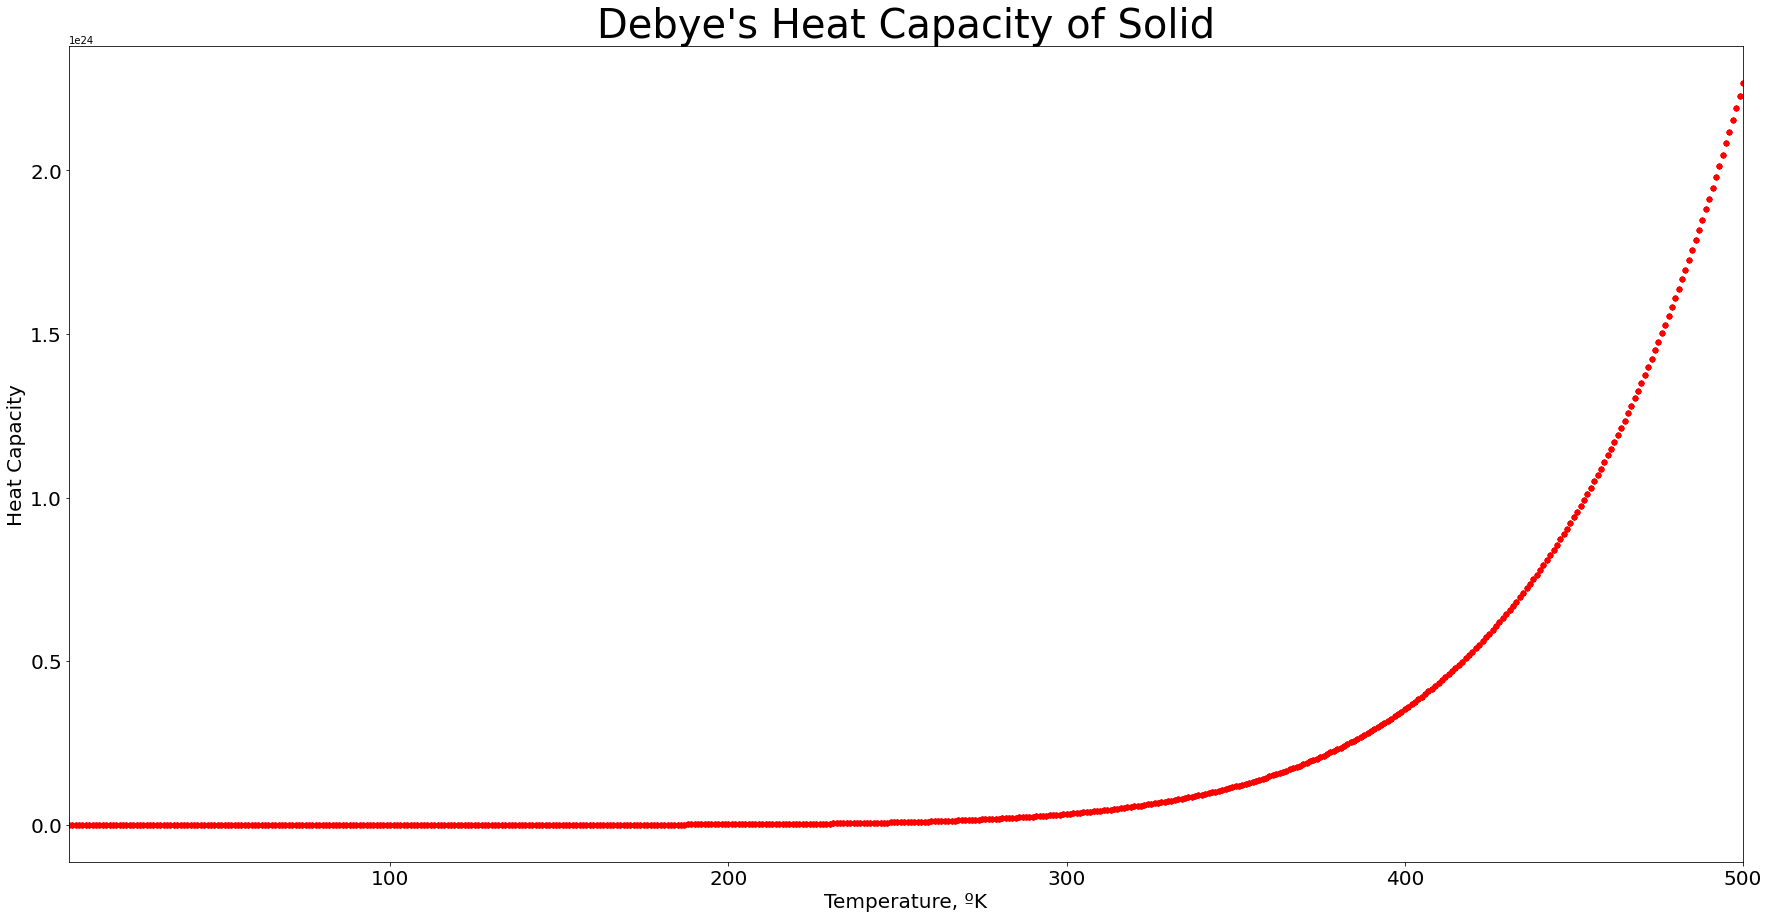

In [4]:
import numpy as np
from matplotlib import pyplot as plot

V = 0.001
rho = 6.022e28
Deb = 428
CONSTANTS = 9*V*rho*(1/Deb)**3
C = CONSTANTS
E = np.e

N = 1000
Tmax = 501
a = 0
b = Deb/Tmax
h = (b-a)/N

def f(x):
    if a == 0:
        return (x**4 * E**x) * C
    else:
        return (x**4 * E**x) / ((E**x - 1)**2) * C

q = 0.5 * f(a) + 0.5 * f(b)
for T in range (0,Tmax):
    q += f(a +T*h) * T**3
    print(q*h, T, file=open("heat3.txt", "a"))

data=np.genfromtxt("heat3.txt", delimiter=" ")
Capacity = data[:,0]
Temperature = data [:,1]
fig = plot.figure(figsize=(30,15))
ax = fig.add_subplot(111)
plot.scatter(Temperature, Capacity, s=20,c='red') 

ax.set_title("Debye's Heat Capacity of Solid", size=40)

ax.set_xlabel('Temperature, ºK',size=20)
ax.set_ylabel('Heat Capacity',size =20)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_xlim(5,500)